In [1]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from angle_QROM_baseline import get_angle_QROM
from angle_QROM_optimized import get_angle_optim_QROM
from angle_QROM_test import plot_results
from angle_QROM_test import get_verification_results

import numpy as np


## Example of dissimilar outputs, to show that we can verify if two circuits are similar

In [2]:
# import numpy as np
vals = np.arange(8)
vals1 = [0,0,2,2,3,3,4,4]
print(vals, vals1)

[0 1 2 3 4 5 6 7] [0, 0, 2, 2, 3, 3, 4, 4]


Counts(ideal): {'1 001': 596, '1 010': 2324, '1 111': 12451, '1 101': 10304, '1 011': 4897, '1 100': 7588, '1 110': 11855}


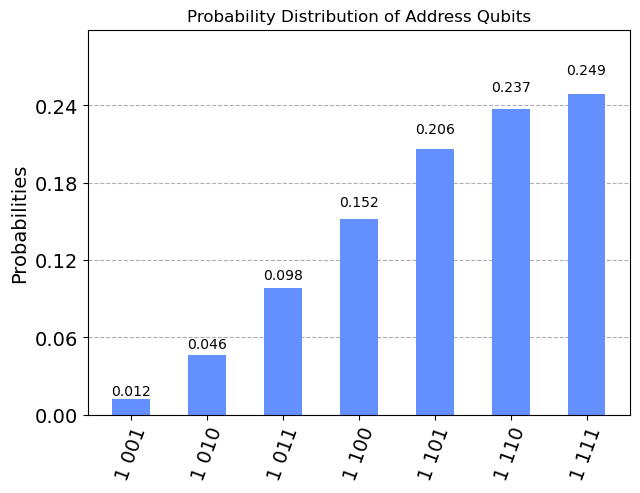

In [3]:
qc_og = get_angle_QROM(vals)
qc_min = get_angle_optim_QROM(vals1)


plot_histogram(plot_results(qc_og, plot_ones=True), title="Probability Distribution of Address Qubits")

Counts(ideal): {'1 111': 12525, '1 011': 6289, '1 010': 6307, '1 101': 10692, '1 100': 10587, '1 110': 12513}


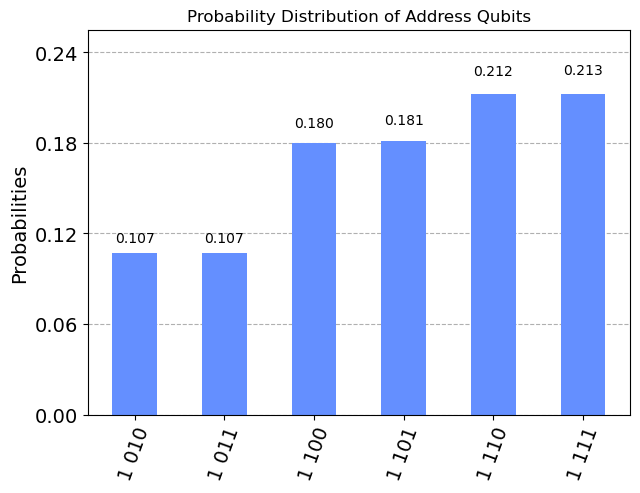

In [4]:
plot_histogram(plot_results(qc_min, plot_ones=True), title="Probability Distribution of Address Qubits")

In [5]:
# verification of dissimilarity on different inputs
qc_og = get_angle_QROM(vals,measurement=False)
qc_min = get_angle_optim_QROM(vals1,measurement=False)

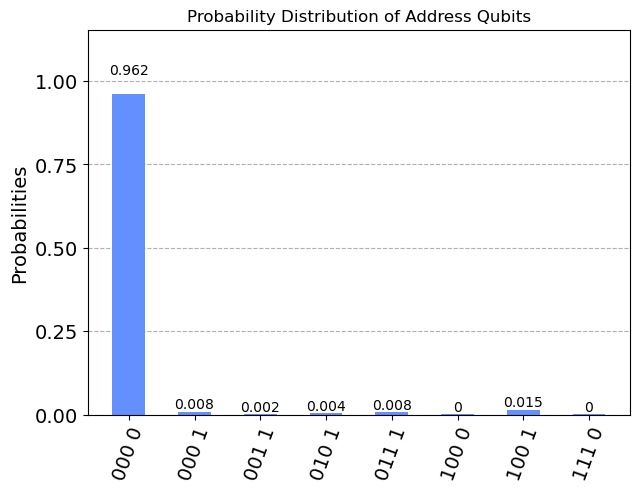

In [6]:
counts_ideal = get_verification_results(qc_og, qc_min)

plot_histogram(counts_ideal, title="Probability Distribution of Address Qubits")

## Showing that QROM optimization technique results in the same values

In [7]:
#passing in same values

vals = np.arange(8)

qc_og = get_angle_QROM(vals)
qc_min = get_angle_optim_QROM(vals)

### Can get the different circuits before and after optimization algorithm

In [8]:
# qc_og.draw()

In [9]:
qc_min.draw()

┌───┐                                                    »
  addr_0: ───┤ H ├──────────────────────────────────────■─────────────»
             ├───┤                                      │          ┌─┐»
  addr_1: ───┤ H ├────────────────────■─────────────────┼─────■────┤M├»
             ├───┤                    │                 │     │    └╥┘»
  addr_2: ───┤ H ├────■───────────────┼──■──────────────┼──■──┼──■──╫─»
          ┌──┴───┴──┐ │ ┌───────────┐ │  │ ┌──────────┐ │  │  │  │  ║ »
    data: ┤ Rx(π/2) ├─■─┤ Rx(-π/14) ├─■──■─┤ Rx(-π/7) ├─■──■──■──■──╫─»
          └─────────┘   └───────────┘      └──────────┘             ║ »
data_m: 1/══════════════════════════════════════════════════════════╬═»
                                                                    ║ »
  ca_m: 3/══════════════════════════════════════════════════════════╩═»
                                                                    1 »
«                                ┌─┐
«  addr_0: ─────────────────■────┤M├
«                           │    └╥┘
«  addr_1: ─────────────────┼─────╫─
«                       ┌─┐ │     ║ 
«  addr_2: ─────────────┤M├─┼─────╫─
«          ┌───────────┐└╥┘ │ ┌─┐ ║ 
«    data: ┤ Rx(-2π/7) ├─╫──■─┤M├─╫─
«          └───────────┘ ║    └╥┘ ║ 
«data_m: 1/══════════════╬═════╩══╬═
«                        ║     0  ║ 
«  ca_m: 3/══════════════╩════════╩═
«                        2        0

### Show that the outputs of different circuits are the same

In [10]:
# verification on same inputs
qc_og = get_angle_QROM(vals,measurement=False)
qc_min = get_angle_optim_QROM(vals,measurement=False)

{'000 0': 10000}


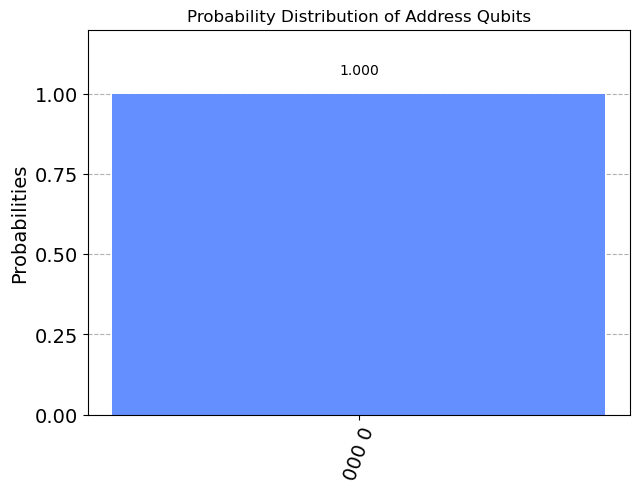

In [11]:
counts_ideal = get_verification_results(qc_og, qc_min)
print(counts_ideal)
plot_histogram(counts_ideal, title="Probability Distribution of Address Qubits")

# Deep testing of similarity of  optimization with random vectors of different sizes

## using $\mathbf{U_{min}\mathbf{U}}^\dagger = |0\rangle$. Later will show just by comparing the sythesized unitaries

In [12]:
for i in range(10):
    rand_length = np.random.randint(16,20)
    vals = np.random.uniform(low=0, high=13.3, size=(rand_length,))
    # vals1 = np.random.uniform(low=0, high=13.3, size=(rand_length,))
    # print(vals, vals.size)
    qc_og = get_angle_QROM(np.copy(vals),measurement=False)
    qc_min = get_angle_optim_QROM(np.copy(vals),measurement=False)

    counts_ideal = get_verification_results(qc_og, qc_min)
    print(counts_ideal)


{'00000 0': 10000}
{'00000 0': 10000}
{'0000 0': 10000}
{'00000 0': 10000}
{'00000 0': 10000}
{'00000 0': 10000}
{'00000 0': 10000}
{'00000 0': 10000}
{'0000 0': 10000}
{'00000 0': 10000}


## Just test using Unitary matrix comparison; avoid using shots

In [18]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer, transpile

In [14]:
backend_sim = Aer.get_backend('unitary_simulator')

In [15]:
for i in range(10):
    rand_length = np.random.randint(4,100)
    print("vector size", rand_length)
    vals = np.random.uniform(low=-10, high=13.3, size=(rand_length,))
    # print(vals, vals.size)
    # qc_og = get_angle_QROM(np.copy(vals),measurement=False)
    qc_min = get_angle_optim_QROM(np.copy(vals),measurement=False)
    qc_og = qc_min
    # qc_min = qc_og
    
    
    job_sim = qiskit.execute([qc_og, qc_min], backend_sim)
    result_sim = job_sim.result()
    unitary1 = result_sim.get_unitary(qc_og)
    unitary2 = result_sim.get_unitary(qc_min)
    
    
    print("Same unitary", unitary1 == unitary2)

vector size 86
Same unitary True
vector size 98


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24381", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 46


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24382", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 36


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24383", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 20


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24384", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 30


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24385", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 33


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24386", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 10


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24387", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(
/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24388", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True
vector size 78
Same unitary True
vector size 13


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24389", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


Same unitary True


/home/aviraj/anaconda3/envs/qc/lib/python3.8/site-packages/qiskit/result/result.py:395: UserWarning: Result object contained multiple results matching name "circuit-24390", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(


### Compare gate counts

In [27]:
gates = []

for i in range(2,32):
    # rand_length = np.random.randint(4,10)
    vals = np.random.uniform(low=0, high=13.3, size=(i,))
    # vals1 = np.random.uniform(low=0, high=13.3, size=(rand_length,))
    # print(vals, vals.size)
    qc_og = get_angle_QROM(np.copy(vals),measurement=False, hadamards=False)
    qc_min = get_angle_optim_QROM(np.copy(vals),measurement=False, hadamards=False)

    qc_og = transpile(qc_og,basis_gates=['rx','ry','rz', 'cx', 'cz'])
    
    print("Num gates: ",end="")
    print(qc_og.size(), qc_min.size())
    
    print("OPs: ",end="")
    print(qc_og.count_ops(), qc_min.count_ops())
    
    gates.append([qc_og.size(), qc_min.size()])
    
    print("Depths: ",end="")
    print(qc_og.depth(), qc_min.depth())

Num gates: 12 4
OPs: OrderedDict([('cx', 4), ('ry', 4), ('rx', 2), ('rz', 2)]) OrderedDict([('rx', 2), ('cz', 2)])
Depths: 10 4
Num gates: 50 8
OPs: OrderedDict([('cx', 24), ('ry', 18), ('rx', 6), ('rz', 2)]) OrderedDict([('rx', 4), ('cz', 4)])
Depths: 38 8
Num gates: 64 8
OPs: OrderedDict([('cx', 32), ('ry', 24), ('rx', 6), ('rz', 2)]) OrderedDict([('rx', 4), ('cz', 4)])
Depths: 50 8
Num gates: 184 16
OPs: OrderedDict([('cx', 100), ('ry', 70), ('rx', 12), ('rz', 2)]) OrderedDict([('rx', 8), ('cz', 8)])
Depths: 142 16
Num gates: 218 16
OPs: OrderedDict([('cx', 120), ('ry', 84), ('rx', 12), ('rz', 2)]) OrderedDict([('rx', 8), ('cz', 8)])
Depths: 170 16
Num gates: 254 16
OPs: OrderedDict([('cx', 140), ('ry', 98), ('rx', 14), ('rz', 2)]) OrderedDict([('rx', 8), ('cz', 8)])
Depths: 198 16
Num gates: 288 16
OPs: OrderedDict([('cx', 160), ('ry', 112), ('rx', 14), ('rz', 2)]) OrderedDict([('rx', 8), ('cz', 8)])
Depths: 226 16
Num gates: 690 32
OPs: OrderedDict([('cx', 396), ('ry', 270), ('rx'

In [29]:
gates_over_size = np.array(gates)

gates_over_size.shape

(30, 2)

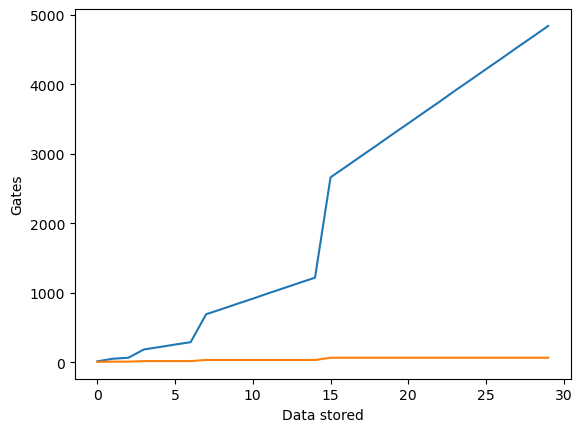

In [43]:
import matplotlib.pyplot as plt


plt.plot(gates_over_size[:,:])
plt.xlabel("Data stored")
plt.ylabel("Gates")

plt.show()

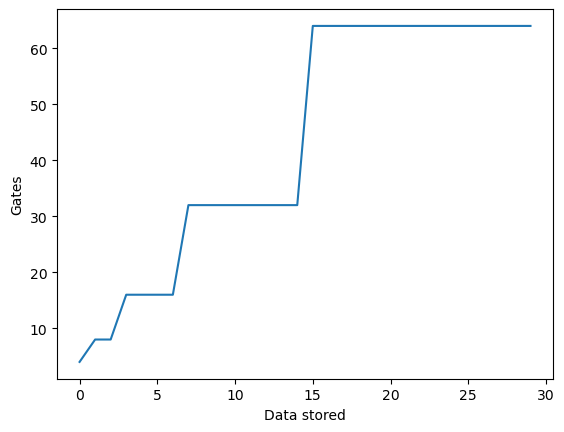

In [42]:
import matplotlib.pyplot as plt


plt.plot(gates_over_size[:,1])
plt.xlabel("Data stored")
plt.ylabel("Gates")
plt.show()